# Introduction to CetaceXplain

The idea behind CetaceXplain is to provide a module which can easily lend insight into what machine learning models for dolphin whistle classification consider important for their decisions. 

This module will give provide some useful tools to get statistical reports about a model's performance, and will use the SHAP library (https://github.com/slundberg/shap) to visualize the pixels of importance on a spectrogram for whistle contour classification.

The link to SHAP provided contains some other interesting features (see shap.GradientExplainer to explain specific layers within a model) which can possible be explored in future.

In [1]:
# For library requirements, run the commented line below in a directory with the requirements.txt file for cetacexplain
# ! pip install -r requirements.txt 


import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [ ]:
# If using Google Drive, use the commented lines below to mount Google Drive so data can be accessed:

# from google.colab import drive
# drive.mount('/content/drive') # '/content' is the current working directory

# Importing CetaceXplain

We access `cetacexplain` by copying it to the current working directory (if not there already), then using the regular `import` command.

In [2]:
# Copy cetacexplain.py to current working  directory (the file path can be changed as needed to access it).
# Example: ! cp /content/drive/MyDrive/'Colab Notebooks'/cetacexplain.py .
# This can be ignored if cetacexplain is already in the current working directory.

import cetacexplain

Instructions for updating:
non-resource variables are not supported in the long term


# Load the Classifier Model and Image Data

Here we load one of the deep learning classifiers which was trained separately, and load some test image data.

In [3]:
IMAGE_SHAPE = (202, 413)
directory_name = "../../model_test_train/"
model = tf.keras.models.load_model(directory_name + "transfer_learning_classifier_fine_tuned_improved.h5")


TEST_DATA_DIR = directory_name + "test"
test_generator = ImageDataGenerator(
                    rescale=1./255
                ).flow_from_directory(
                      TEST_DATA_DIR,
                      shuffle=True,
                      batch_size = 50,
                      target_size=IMAGE_SHAPE
                      )

Instructions for updating:
Colocations handled automatically by placer.
Found 600 images belonging to 3 classes.


# Create ImageClassifierModel

Now we use `cetacexplain` to create an `ImageClassifierModel` using the tensorflow deep learning model, and show an example of the `explain` function. Pixels which the model considers as positive for the image's class are highlighted red, while those which it considers negative for a classification are coloured blue. 

See https://github.com/slundberg/shap#deep-learning-example-with-deepexplainer-tensorflowkeras-models for a very clear example using the MNIST dataset.

Predicted Labels (in order of appearance of images below):
common
common
bottlenose
bottlenose


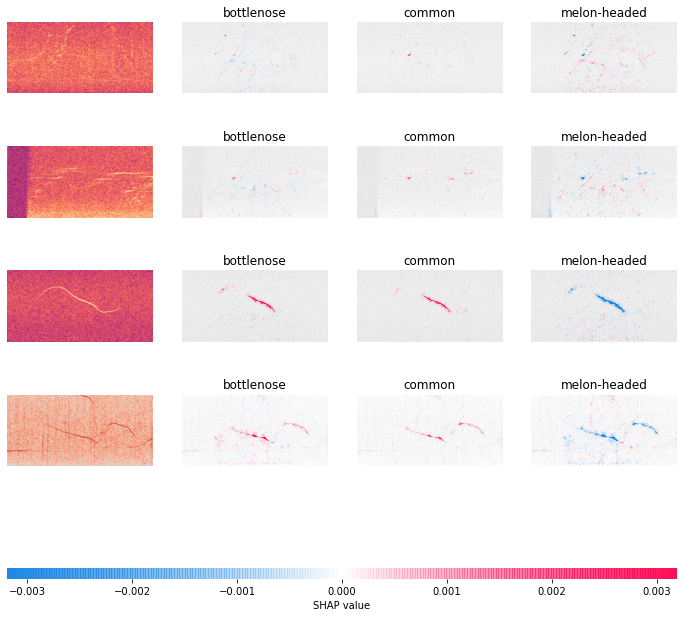

In [7]:
image_data, image_labels = test_generator.next()

# create background images for explainer to learn see expected model output
# and create test images for explanation
background_images, test_images = image_data[0:10], image_data[30:34]

new_model = cetacexplain.ImageClassifierModel(model, background_images, image_labels.argmax(axis = 1), 
            class_names = list(test_generator.class_indices.keys()))

# show example of explain function
new_model.explain(test_images)

# Show Statistical Metrics

We show how the ImageClassifierModel's other methods can be used to get an idea of the classifier model's statistical performance as well.

              precision    recall  f1-score   support

  bottlenose       0.67      0.77      0.71        13
      common       0.58      0.74      0.65        19
melon-headed       1.00      0.61      0.76        18

    accuracy                           0.70        50
   macro avg       0.75      0.71      0.71        50
weighted avg       0.76      0.70      0.71        50



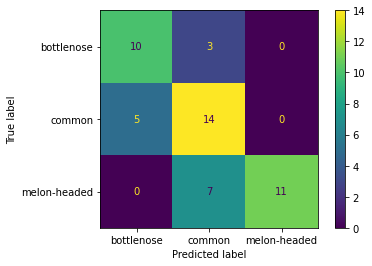

In [8]:
# get statistical metrics for batch tested
print(new_model.report_stats(image_data, image_labels))
new_model.show_confusion_matrix(image_data, image_labels)